Você pode imaginar uma Series do Pandas como uma versão especializada de um dicionário do Python. Enquanto um dicionário mapeia chaves arbitrárias para valores arbitrários, uma Series mapeia chaves e valores com tipos específicos. Essa tipagem é crucial: assim como os arrays do NumPy são mais eficientes que listas do Python devido à tipagem, a Series do Pandas é muito mais eficiente que dicionários do Python para certas operações devido às suas informações de tipo.

###   pd . Série ( dados ,  índice = índice )

### O objeto Pandas DataFrame 
DataFrame pode ser pensado como uma generalização de um array NumPy ou como uma especialização de um dicionário Python.

![Operador Pandas](https://raw.githubusercontent.com/naticost/DataAnalytics/main/Python/img/operatormet.png)

### Alinhamento de Índice no DataFrame

Um tipo semelhante de alinhamento ocorre para colunas e índices ao realizar operações em DataFrames:

In [5]:
import numpy as np
import pandas as pd

# Gerando dados aleatórios para os DataFrames
rng = np.random.default_rng()
A = pd.DataFrame(rng.integers(0, 20, (2, 2)), columns=list('AB'))
B = pd.DataFrame(rng.integers(0, 10, (3, 3)), columns=list('BAC'))

print("DataFrame A:")
print(A)

print("\nDataFrame B:")
print(B)


DataFrame A:
    A  B
0   8  6
1  11  0

DataFrame B:
   B  A  C
0  2  4  3
1  8  2  3
2  6  3  8


In [6]:
result = A + B
print("\nResultado de A + B:")
print(result)



Resultado de A + B:
      A    B   C
0  12.0  8.0 NaN
1  13.0  8.0 NaN
2   NaN  NaN NaN


### Alinhamento de Índices
Os índices e colunas são alinhados automaticamente. Se um índice ou coluna não existe em ambos os DataFrames, o resultado será NaN.

### Preenchendo Valores Faltantes
Se não quisermos NaN para valores faltantes, podemos usar o método add e especificar um valor de preenchimento (fill_value):

In [7]:
fill_value = A.stack().mean()  # Calculando a média dos valores em A
result_fill = A.add(B, fill_value=fill_value)
print("\nResultado de A.add(B, fill_value=fill_value):")
print(result_fill)



Resultado de A.add(B, fill_value=fill_value):
       A      B      C
0  12.00   8.00   9.25
1  13.00   8.00   9.25
2   9.25  12.25  14.25


### O Pandas facilita operações entre DataFrames, alinhando automaticamente os índices e colunas. Podemos evitar NaNs resultantes de alinhamentos usando o método add com fill_value.

### None: Dados Ausentes no Pandas
O Pandas usa None, um objeto do Python, para representar dados ausentes. No entanto, None só pode ser usado em arrays de objetos (dtype=object). Vamos ver como isso funciona na prática e entender suas implicações.

Exemplo com None
Vamos criar um array do NumPy contendo None e observar o comportamento:

In [8]:
import numpy as np

# Criando um array do NumPy com valores ausentes (None)
vals1 = np.array([1, None, 3, 4])
print(vals1)


[1 None 3 4]


O dtype=object significa que o NumPy identificou que os elementos do array são objetos Python (como None), e não números comuns como inteiros ou floats.

O que significa dtype=object?
Representação de Objetos Python:

dtype=object indica que o array pode conter qualquer tipo de objeto Python, como números, strings, ou até mesmo None.
Isso é útil quando você precisa misturar diferentes tipos de dados em um array.
Desempenho mais lento:

Arrays de objetos (dtype=object) são mais lentos do que arrays de tipos nativos do NumPy (como int ou float), porque as operações são realizadas no nível do Python, o que envolve mais processamento.
Veja a comparação de desempenho abaixo:

In [9]:
# Comparação de desempenho entre arrays de objetos e arrays de inteiros
for dtype in ['object', 'int']:
    print(f"dtype={dtype}")
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()


dtype=object
63.6 ms ± 3.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype=int
2.7 ms ± 370 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)



# Resumo das Diferenças
### Dados Ausentes:
Refere-se à falta de dados onde eles deveriam estar, representados geralmente por NaN em contextos numéricos e por None em contextos gerais.

### Dados Nulos: 
É um conceito mais amplo que pode incluir a ausência de valor ou dados desconhecidos. Em bancos de dados, é representado como NULL. Em Python/Pandas, None é frequentemente usado para representar dados nulos e é convertido para NaN em operações numéricas.

### NaN: Representação de Dados Ausentes Numéricos
O NaN (Not a Number) é uma forma comum de representar dados ausentes em contextos numéricos. É um valor especial de ponto flutuante reconhecido por sistemas que utilizam a representação de ponto flutuante padrão IEEE.

Exemplo com NaN
Vamos criar um array do NumPy com NaN e ver como ele é tratado:

In [10]:
import numpy as np

# Criando um array do NumPy com NaN
vals2 = np.array([1, np.nan, 3, 4])
print(vals2)
print("Tipo de dados:", vals2.dtype)


[ 1. nan  3.  4.]
Tipo de dados: float64


### Comportamento do NaN
Operações com NaN: Quando você realiza operações com NaN, o resultado geralmente será NaN. Isso pode ser problemático, pois NaN se comporta como um "vírus de dados" que se propaga:

In [11]:
print(1 + np.nan)  # Resulta em NaN
print(0 * np.nan)  # Resulta em NaN


nan
nan


Agregações com NaN: As funções padrão de agregação, como soma, mínimo e máximo, também retornam NaN se o array contiver NaN:

In [12]:
print(vals2.sum())  # Resulta em NaN
print(vals2.min())  # Resulta em NaN
print(vals2.max())  # Resulta em NaN


nan
nan
nan


Funções específicas para NaN: O NumPy oferece funções que ignoram NaN ao realizar agregações:

In [ ]:
print(np.nansum(vals2))  # Soma ignorando NaN: 8.0
print(np.nanmin(vals2))  # Mínimo ignorando NaN: 1.0
print(np.nanmax(vals2))  # Máximo ignorando NaN: 4.0


### O Pandas é projetado para lidar com NaN e None, tratando-os de maneira semelhante:

In [13]:
import pandas as pd

# Criando uma Série do Pandas com NaN e None
s = pd.Series([1, np.nan, 2, None])
print(s)


0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64


 Conversão de Tipo: Quando um valor NaN é inserido em uma Série de inteiros, o Pandas converte automaticamente o tipo para float64:


 Isso ocorre porque o None é convertido para NaN, que é um tipo de ponto flutuante.

In [14]:
x = pd.Series(range(2), dtype=int)
print(x)

x[0] = None
print(x)


0    0
1    1
dtype: int32
0    NaN
1    1.0
dtype: float64


![Valores em NA](https://raw.githubusercontent.com/naticost/DataAnalytics/main/Python/img/valoresNAN.png)


### Trabalhando com Valores Nulos

No Pandas, `None` e `NaN` são tratados de forma intercambiável para representar valores ausentes. Para gerenciar esses valores nulos, o Pandas oferece vários métodos úteis:

- **`isnull()`**: Cria uma máscara booleana que indica onde os valores estão ausentes.
- **`notnull()`**: Faz o oposto de `isnull()`, mostrando onde os valores não estão ausentes.
- **`dropna()`**: Retorna uma versão dos dados onde os valores ausentes foram removidos.
- **`fillna()`**: Retorna uma cópia dos dados onde os valores ausentes foram preenchidos com um valor especificado.

Esses métodos ajudam a identificar, limpar e substituir valores nulos em seus DataFrames e Series.

In [15]:
import pandas as pd
import numpy as np

dados = pd.Series([1, np.nan, 'hello', None])
print(dados.isnull())  # Indica onde os valores são nulos
print(dados.notnull())  # Indica onde os valores não são nulos


0    False
1     True
2    False
3     True
dtype: bool
0     True
1    False
2     True
3    False
dtype: bool


In [21]:
df = pd.DataFrame([[1, np.nan, 2], [2, 3, 5], [np.nan, 4, 6]])
print("Data Frame Exemplo")
print(df)
print("-----------------------------")

# Remove linhas com qualquer valor nulo
print(df.dropna())
print("-----------------------------")

# Remove colunas com qualquer valor nulo
print(df.dropna(axis='columns'))
print("-----------------------------")

# Remove linhas onde todos os valores são nulos
df[3] = np.nan
print(df.dropna(axis='columns', how='all'))
print("-----------------------------")

# Remove linhas com menos de 3 valores não nulos
print(df.dropna(axis='rows', thresh=3))


Data Frame Exemplo
     0    1  2
0  1.0  NaN  2
1  2.0  3.0  5
2  NaN  4.0  6
-----------------------------
     0    1  2
1  2.0  3.0  5
-----------------------------
   2
0  2
1  5
2  6
-----------------------------
     0    1  2
0  1.0  NaN  2
1  2.0  3.0  5
2  NaN  4.0  6
-----------------------------
     0    1  2   3
1  2.0  3.0  5 NaN


### Preenchendo Valores Nulos
Em vez de remover valores nulos, você pode optar por substituí-los por valores válidos. Isso pode ser feito substituindo por um único número, como zero, ou utilizando métodos de imputação ou interpolação. O Pandas facilita esse processo com o método fillna(), que cria uma cópia dos dados com os valores nulos substituídos.

In [22]:
import pandas as pd
import numpy as np

dados = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
print(dados)


a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64


In [23]:
dados.fillna(0)


a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [24]:
dados.fillna(method='ffill')


C:\Users\Trocados\AppData\Local\Temp\ipykernel_11476\2068584607.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dados.fillna(method='ffill')


a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

Para DataFrames, as opções são semelhantes e você também pode especificar o eixo ao longo do qual o preenchimento ocorre:

In [25]:
df = pd.DataFrame([[1, np.nan, 2, np.nan], [2, 3, 5, np.nan], [np.nan, 4, 6, np.nan]])
print(df)


     0    1  2   3
0  1.0  NaN  2 NaN
1  2.0  3.0  5 NaN
2  NaN  4.0  6 NaN


In [26]:
df.fillna(method='ffill', axis=1)


C:\Users\Trocados\AppData\Local\Temp\ipykernel_11476\4240272785.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', axis=1)


,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


### Resumo e Exemplos sobre MultiIndex no Pandas

**Conceitos Principais:**

1. **Criação de MultiIndex:**
   - **Listas de Tuplas:** Você pode criar um `MultiIndex` a partir de uma lista de tuplas, onde cada tupla representa um ponto de dados para cada nível do índice.
   - **Listas de Arrays:** Também é possível construir um `MultiIndex` utilizando listas de arrays, onde cada array contém os valores para cada nível de índice.
   - **Produto Cartesiano:** O `MultiIndex` pode ser gerado usando o produto cartesiano dos índices individuais, o que cria uma combinação de todos os valores possíveis entre os níveis.
   - **Nomes de Nível:** Atribuir nomes aos níveis do `MultiIndex` ajuda na clareza e na organização dos dados.

**Exemplo Prático:**

1. **Series Multiplicada:**
   - Um exemplo de uma `Series` com dois níveis de índices, como `estado` e `ano`, demonstra como acessar e manipular dados hierarquicamente.

2. **DataFrame Multiplicado:**
   - Um `DataFrame` com índices e colunas hierárquicas (por exemplo, dados médicos por `ano` e `visita`) ilustra a aplicação prática do `MultiIndex`.

**Operações Comuns:**

1. **Indexação e Fatiamento:** Você pode indexar e fatiar dados em um `MultiIndex` de maneira intuitiva, utilizando múltiplos níveis de índices.
2. **Conversão:** Converta entre `Series` e `DataFrames` usando métodos como `unstack()` e `stack()`.
3. **Seleção Parcial:** Selecione dados com base em um nível específico do índice usando sintaxe simplificada.

**Métodos de Criação:**

1. **Construtores Diretos:** Utilize métodos como `pd.MultiIndex.from_tuples()` ou `pd.MultiIndex.from_arrays()` para criar um `MultiIndex`.
2. **Construção Explícita:** Crie o `MultiIndex` diretamente com níveis e rótulos definidos.




### Lista de Tuplas

In [27]:
import pandas as pd

# Criação de MultiIndex com listas de tuplas
tuples = [('Brasil', 2023), ('Brasil', 2024), ('EUA', 2023), ('EUA', 2024)]
multi_index = pd.MultiIndex.from_tuples(tuples, names=['País', 'Ano'])
print(multi_index)


MultiIndex([('Brasil', 2023),
            ('Brasil', 2024),
            (   'EUA', 2023),
            (   'EUA', 2024)],
           names=['País', 'Ano'])


### Listas de Arrays

In [28]:
import pandas as pd

# Criação de MultiIndex com listas de arrays
arrays = [['Brasil', 'Brasil', 'EUA', 'EUA'], [2023, 2024, 2023, 2024]]
multi_index = pd.MultiIndex.from_arrays(arrays, names=['País', 'Ano'])
print(multi_index)


MultiIndex([('Brasil', 2023),
            ('Brasil', 2024),
            (   'EUA', 2023),
            (   'EUA', 2024)],
           names=['País', 'Ano'])


### Produto Cartesiano

In [29]:
import pandas as pd
import itertools

# Criação de MultiIndex usando o produto cartesiano
levels = [['Brasil', 'EUA'], [2023, 2024]]
multi_index = pd.MultiIndex.from_product(levels, names=['País', 'Ano'])
print(multi_index)


MultiIndex([('Brasil', 2023),
            ('Brasil', 2024),
            (   'EUA', 2023),
            (   'EUA', 2024)],
           names=['País', 'Ano'])


### Nomes de Nível 

In [30]:
import pandas as pd

# Criação de MultiIndex com nomes de nível
tuples = [('Brasil', 2023), ('EUA', 2024)]
multi_index = pd.MultiIndex.from_tuples(tuples, names=['País', 'Ano'])
print(multi_index)


MultiIndex([('Brasil', 2023),
            (   'EUA', 2024)],
           names=['País', 'Ano'])


### Series Multiplicada

In [31]:
import pandas as pd

# Criação de uma Series com MultiIndex
index = pd.MultiIndex.from_tuples([('SP', 2023), ('SP', 2024), ('RJ', 2023), ('RJ', 2024)], names=['Estado', 'Ano'])
data = pd.Series([100, 150, 200, 250], index=index)
print(data)
print(data.loc['SP'])


Estado  Ano 
SP      2023    100
        2024    150
RJ      2023    200
        2024    250
dtype: int64
Ano
2023    100
2024    150
dtype: int64


### DataFrame Mulplicado

In [32]:
import pandas as pd

# Criação de um DataFrame com MultiIndex
index = pd.MultiIndex.from_tuples([('Paciente1', 'Visita1'), ('Paciente1', 'Visita2'), ('Paciente2', 'Visita1')], names=['Paciente', 'Visita'])
columns = pd.MultiIndex.from_tuples([('Exame', 'Sanguíneo'), ('Exame', 'Urina'), ('Resultado', 'Valor')])
data = pd.DataFrame([[10, 5, 1], [12, 4, 2], [15, 6, 3]], index=index, columns=columns)
print(data)


                      Exame       Resultado
                  Sanguíneo Urina     Valor
Paciente  Visita                           
Paciente1 Visita1        10     5         1
          Visita2        12     4         2
Paciente2 Visita1        15     6         3


### Indexação e Fatiamento

In [33]:
import pandas as pd

# Criação de MultiIndex e DataFrame
index = pd.MultiIndex.from_tuples([('SP', 2023), ('SP', 2024), ('RJ', 2023), ('RJ', 2024)], names=['Estado', 'Ano'])
data = pd.DataFrame([10, 20, 30, 40], index=index, columns=['Valor'])
print(data.loc['SP'])


      Valor
Ano        
2023     10
2024     20


### Conversão

In [34]:
import pandas as pd

# Criação de uma Series com MultiIndex
index = pd.MultiIndex.from_tuples([('A', 'x'), ('A', 'y'), ('B', 'x'), ('B', 'y')])
data = pd.Series([1, 2, 3, 4], index=index)

# Conversão para DataFrame
df = data.unstack()
print(df)

# Conversão de volta para Series
series = df.stack()
print(series)


   x  y
A  1  2
B  3  4
A  x    1
   y    2
B  x    3
   y    4
dtype: int64


### Seleção Parcial

In [35]:
import pandas as pd

# Criação de uma Series com MultiIndex
index = pd.MultiIndex.from_tuples([('SP', 2023), ('SP', 2024), ('RJ', 2023), ('RJ', 2024)], names=['Estado', 'Ano'])
data = pd.Series([10, 20, 30, 40], index=index)

# Seleção parcial
print(data.xs('SP', level='Estado'))


Ano
2023    10
2024    20
dtype: int64


### Construtores Diretos

In [36]:
import pandas as pd

# Criar MultiIndex diretamente a partir de tuplas
multi_index = pd.MultiIndex.from_tuples([('A', 1), ('B', 2)], names=['Letra', 'Número'])
print(multi_index)

# Criar MultiIndex diretamente a partir de arrays
arrays = [['A', 'B'], [1, 2]]
multi_index = pd.MultiIndex.from_arrays(arrays, names=['Letra', 'Número'])
print(multi_index)


MultiIndex([('A', 1),
            ('B', 2)],
           names=['Letra', 'Número'])
MultiIndex([('A', 1),
            ('B', 2)],
           names=['Letra', 'Número'])


### Construção Explícita 

In [37]:
import pandas as pd

# Construção explícita de um MultiIndex
multi_index = pd.MultiIndex(levels=[['A', 'B'], [1, 2]], codes=[[0, 0, 1, 1], [0, 1, 0, 1]], names=['Letra', 'Número'])
print(multi_index)


MultiIndex([('A', 1),
            ('A', 2),
            ('B', 1),
            ('B', 2)],
           names=['Letra', 'Número'])


# Combining Datasets - Concat and Append

A combinação de datasets é uma prática comum na análise de dados, permitindo unir diferentes fontes de informação. O Pandas facilita essa tarefa com funções como pd.concat() e o método append().

In [1]:
import pandas as pd
import numpy as np

### Função Auxiliar: Uma função para criar DataFrames rapidamente

def make_df(cols, ind):
    """Cria rapidamente um DataFrame"""
    data = {c: [str(c) + str(i) for i in ind] for c in cols}
    return pd.DataFrame(data, ind)

# Exemplo de DataFrame
make_df('ABC', range(3))



,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


### Concatenando Arrays NumPy
A concatenação de objetos Series e DataFrame é semelhante à de arrays NumPy, feita via np.concatenate

In [5]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])
# array([1, 2, 3, 4, 5, 6, 7, 8, 9])


array([1, 2, 3, 4, 5, 6, 7, 8, 9])

### Concatenação Simples com pd.concat
O Pandas possui a função pd.concat() com várias opções:

In [8]:

# Criando duas séries
ser1 = pd.Series(['G', 'H', 'I'], index=[1, 2, 3])
ser2 = pd.Series(['J', 'K', 'L'], index=[4, 5, 6])

# Concatenando as séries
result_series = pd.concat([ser1, ser2])

print(result_series)


1    G
2    H
3    I
4    J
5    K
6    L
dtype: object


In [7]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
display('df1', 'df2', 'pd.concat([df1, df2])')


,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


### Lidando com Índices Duplicados
Para evitar índices duplicados, pode-se usar a flag verify_integrity:

In [9]:
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)
# ValueError: Indexes have overlapping values: [0, 1]


TypeError: cannot concatenate object of type '<class 'list'>'; only Series and DataFrame objs are valid

### Concatenação com Junções
Concatenando DataFrames com colunas diferentes

In [12]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
pd.concat([df5, df6])

,A,B,C,D
1,A1,B1,C1,NaN
2,A2,B2,C2,NaN
3,NaN,B3,C3,D3
4,NaN,B4,C4,D4


### Método append()
O método append() pode ser usado para concatenar DataFrames:

In [20]:
import pandas as pd

# Criando dois DataFrames
df1 = pd.DataFrame({
    'A': ['A1', 'A2', 'A3'],
    'B': ['B1', 'B2', 'B3']
})

df2 = pd.DataFrame({
    'A': ['A4', 'A5'],
    'B': ['B4', 'B5']
})

# Usando o método concat para concatenar os DataFrames
result_df = pd.concat([df1, df2])

print(result_df)


    A   B
0  A1  B1
1  A2  B2
2  A3  B3
0  A4  B4
1  A5  B5


# Operações de Join e Merge no Pandas

O Pandas oferece operações de join e merge de alta performance, semelhantes às interações de dados em bancos de dados, através da função pd.merge.

### Álgebra Relacional
A função pd.merge() implementa operações fundamentais da álgebra relacional, permitindo operações eficientes em datasets. Essas operações podem ser combinadas para realizar operações compostas complexas.

## Categorias de Joins
### One-to-One Joins
Mescla dois DataFrames com base em uma coluna chave comum.

In [24]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})

df3 = pd.merge(df1, df2)
print(df3)


  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


### Many-to-One Joins
Mescla onde uma das colunas chave contém entradas duplicadas.

In [23]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
df5 = pd.merge(df3, df4)
print(df5)


  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve


### Many-to-Many Joins
Mescla onde ambas as colunas chave contêm duplicatas.

In [25]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
df6 = pd.merge(df1, df5)
print(df6)

  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization


## Especificando a Chave de Mescla

### Palavra-chave on
Especifica explicitamente o nome da coluna chave.

In [26]:
pd.merge(df1, df2, on='employee')


,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


### Palavras-chave left_on e right_on
Mescla datasets com diferentes nomes de coluna.

In [27]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)


,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


### Palavras-chave left_index e right_index
Mescla utilizando índices ao invés de colunas.

In [28]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
pd.merge(df1a, df2a, left_index=True, right_index=True)


,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


## Especificando Aritmética de Conjuntos para Joins


### Join Interno (default)
Retorna a interseção dos conjuntos de entrada.

In [37]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},

                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])


print(df6)
print("---------------")
print(df7)
print("---------------")

pd.merge(df6, df7)

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
---------------
     name drink
0    Mary  wine
1  Joseph  beer
---------------


,name,food,drink
0,Mary,bread,wine


### Join Externo
Inclui todos os registros de ambos os DataFrames.

In [30]:
pd.merge(df6, df7, how='outer')


,name,food,drink
0,Joseph,NaN,beer
1,Mary,bread,wine
2,Paul,beans,NaN
3,Peter,fish,NaN


### Join à Esquerda
Inclui todos os registros do DataFrame à esquerda.

In [31]:
pd.merge(df6, df7, how='left')


,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine


### Join à Direita
Inclui todos os registros do DataFrame à direita.

In [32]:
pd.merge(df6, df7, how='right')


,name,food,drink
0,Mary,bread,wine
1,Joseph,NaN,beer


## Resumo de Agrupamentos e Agregações com Pandas
A análise de grandes conjuntos de dados frequentemente requer a sumarização eficiente desses dados. Operações de agregação, como soma, média, mediana, mínimo e máximo, ajudam a obter uma visão sobre a natureza do conjunto de dados. Nesta seção, exploraremos agregações no Pandas, desde operações simples até operações mais sofisticadas usando o conceito de groupby.

### Conjunto de Dados de Planetas
Vamos utilizar o dataset de planetas disponível no Seaborn, que contém informações sobre planetas descobertos em torno de outras estrelas.



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

planets = sns.load_dataset('planets')
display(planets.head())


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


### Agregação Simples no Pandas
Para séries Pandas, agregações como soma e média retornam um único valor:

In [3]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
display(ser.sum(), ser.mean())


2.811925491708157

0.5623850983416314

In [4]:
df = pd.DataFrame({'A': rng.rand(5), 'B': rng.rand(5)})
display(df.mean())


A    0.477888
B    0.443420
dtype: float64

### Método describe
O método describe computa várias agregações comuns para cada coluna

In [5]:
display(planets.dropna().describe())


,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


### Agregações com groupby
A operação groupby permite agrupar dados com base em um rótulo ou índice e aplicar uma função de agregação a esses grupos. Por exemplo:

In [6]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'], 'data': range(6)})
grouped = df.groupby('key')
display(grouped.sum())


,data
key,
A,3
B,5
C,7


### Iteração Sobre Grupos
Você pode iterar diretamente sobre os grupos:

In [7]:
for method, group in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))


Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


### Métodos de Despacho
Qualquer método não implementado explicitamente pelo GroupBy será passado e chamado nos grupos. Por exemplo, o método describe pode ser usado para descrever cada grupo de dados:

In [8]:
display(planets.groupby('method')['year'].describe().unstack())


       method                       
count  Astrometry                          2.0
       Eclipse Timing Variations           9.0
       Imaging                            38.0
       Microlensing                       23.0
       Orbital Brightness Modulation       3.0
                                         ...  
max    Pulsar Timing                    2011.0
       Pulsation Timing Variations      2007.0
       Radial Velocity                  2014.0
       Transit                          2014.0
       Transit Timing Variations        2014.0
Length: 80, dtype: float64

# Guia de Estudo: Tabelas Dinâmicas com Pandas

## Introdução

Tabelas dinâmicas (pivot tables) são uma ferramenta poderosa no Pandas para resumir, agrupar e analisar grandes conjuntos de dados. Elas permitem transformar os dados, agregando-os de diferentes maneiras, facilitando a extração de insights valiosos.

## Criação de Tabelas Dinâmicas

### Estrutura Básica

A função `pivot_table` é usada para criar tabelas dinâmicas no Pandas. A estrutura básica é a seguinte:

data: DataFrame que contém os dados.

values: Coluna(s) que contém os valores a serem agregados.

index: Coluna(s) para usar como índices das linhas.

columns: Coluna(s) para usar como cabeçalhos das colunas.

aggfunc: Função de agregação (por exemplo, sum, mean, count).

Funções de Agregação
Agregações Comuns
Você pode usar várias funções de agregação além de mean e sum, tais como:

count: Contar o número de ocorrências.
min: Encontrar o valor mínimo.
max: Encontrar o valor máximo.
median: Calcular a mediana.
std: Calcular o desvio padrão.


In [10]:
planets = sns.load_dataset('planets')
display(planets.head())

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [12]:
# Criando uma tabela dinâmica para analisar o número de planetas descobertos por ano e método de descoberta
pivot_table = planets.pivot_table(
    values='number',
    index='year',
    columns='method',
    aggfunc='count',
    fill_value=0
)
print("\nTabela dinâmica - Número de planetas descobertos por ano e método de descoberta:")
print(pivot_table)


Tabela dinâmica - Número de planetas descobertos por ano e método de descoberta:
method  Astrometry  Eclipse Timing Variations  Imaging  Microlensing  \
year                                                                   
1989             0                          0        0             0   
1992             0                          0        0             0   
1994             0                          0        0             0   
1995             0                          0        0             0   
1996             0                          0        0             0   
1997             0                          0        0             0   
1998             0                          0        0             0   
1999             0                          0        0             0   
2000             0                          0        0             0   
2001             0                          0        0             0   
2002             0                          0        0

In [13]:
# Criando uma tabela dinâmica para analisar a média da massa dos planetas por método de descoberta
pivot_table_mass = planets.pivot_table(
    values='mass',
    index='method',
    aggfunc='mean'
)
print("\nTabela dinâmica - Média da massa dos planetas por método de descoberta:")
print(pivot_table_mass)


Tabela dinâmica - Média da massa dos planetas por método de descoberta:
                               mass
method                             
Eclipse Timing Variations  5.125000
Radial Velocity            2.630699
Transit                    1.470000


In [14]:
# Adicionando uma coluna de total de descobertas por ano
pivot_table['Total Discoveries'] = pivot_table.sum(axis=1)

print("\nTabela dinâmica com a coluna de total de descobertas por ano:")
print(pivot_table)


Tabela dinâmica com a coluna de total de descobertas por ano:
method  Astrometry  Eclipse Timing Variations  Imaging  Microlensing  \
year                                                                   
1989             0                          0        0             0   
1992             0                          0        0             0   
1994             0                          0        0             0   
1995             0                          0        0             0   
1996             0                          0        0             0   
1997             0                          0        0             0   
1998             0                          0        0             0   
1999             0                          0        0             0   
2000             0                          0        0             0   
2001             0                          0        0             0   
2002             0                          0        0             0   
2

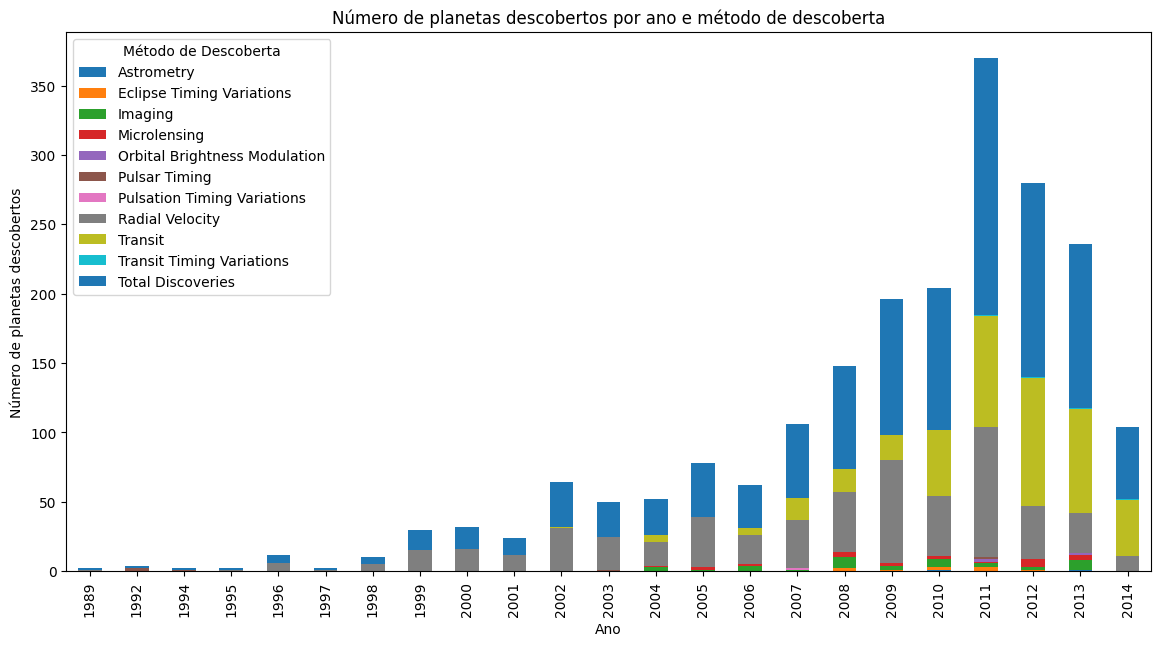

In [15]:
# Visualizando a tabela dinâmica usando matplotlib
import matplotlib.pyplot as plt

pivot_table.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Número de planetas descobertos por ano e método de descoberta')
plt.xlabel('Ano')
plt.ylabel('Número de planetas descobertos')
plt.legend(title='Método de Descoberta')
plt.show()

# Resumo sobre Operações de Strings Vetorizadas com Pandas


Uma das forças do Python é sua facilidade em lidar e manipular dados de string. O Pandas aprimora isso ao fornecer um conjunto abrangente de operações de string vetorizadas que são essenciais para a limpeza de dados do mundo real.

### Operações de String com Pandas
Criação de Séries de String
Podemos criar uma série de dados de string da seguinte forma:

In [1]:
import pandas as pd
data = ['peter', 'Paul', 'MARY', 'gUIDO']
names = pd.Series(data)
print(names)


0    peter
1     Paul
2     MARY
3    gUIDO
dtype: object


### Capitalização
Para capitalizar todas as entradas, ignorando valores nulos:

In [2]:
capitalized_names = names.str.capitalize()
print(capitalized_names)


0    Peter
1     Paul
2     Mary
3    Guido
dtype: object


### Métodos de String Vetorizados no Pandas
Métodos Semelhantes aos do Python
Os métodos de string do Pandas espelham muitos métodos de string do Python:

lower(): Converte para minúsculas

upper(): Converte para maiúsculas

len(): Retorna o comprimento das strings

startswith(): Verifica se a string começa com um padrão específico

In [3]:
print(names.str.lower())
print(names.str.len())
print(names.str.startswith('T'))


0    peter
1     paul
2     mary
3    guido
dtype: object
0    5
1    4
2    4
3    5
dtype: int64
0    False
1    False
2    False
3    False
dtype: bool


### Métodos Usando Expressões Regulares
Pandas também fornece métodos que aceitam expressões regulares:

match(): Aplica re.match()

extract(): Extrai grupos correspondentes

findall(): Aplica re.findall()

replace(): Substitui ocorrências do padrão

contains(): Verifica se contém o padrão

split(): Divide a string

In [4]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam', 'Eric Idle', 'Terry Jones', 'Michael Palin'])
first_names = monte.str.extract('([A-Za-z]+)')
print(first_names)


         0
0   Graham
1     John
2    Terry
3     Eric
4    Terry
5  Michael
